In [1]:
from math import *
import numpy as np
import scipy.interpolate as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter

In [2]:
import pandas as pd

In [3]:
readers = {}

In [4]:
jxlfile = open('./cjxl/average.csv', 'r', newline='')
jxlreader = pd.read_csv(jxlfile, sep='\t')
a = jxlreader["Method"].map(lambda x: x.split(" ")[1])
jxlreader["Method"].update(a)

readers["cjxl -s 7"] = jxlreader

In [5]:
aviffile = open('./avif/average.csv', 'r', newline='')
avifreader = pd.read_csv(aviffile, sep='\t')
a = avifreader["Method"].map(lambda x: x.split("--max ")[1].split(" ")[0])
avifreader["Method"].update(a)
avifreader.drop_duplicates(subset=["Res bpp"],inplace=True, ignore_index=True)

readers["avif -a end-usage=q -a color:enable-chroma-deltaq=1"] = avifreader

In [6]:
def plot_2d(ax_main, ax_bottom, x, y, x_new, y_new, label=''):
    sc1_main = ax_main.plot(x_new, y_new, label=label)
    sc2 = ax_main.scatter(x, y,
            linewidths=1, alpha=.7,
            marker='o',
            edgecolor='k',
            s=20,
            c='None')
    sb = ax_bottom.plot(x_new,z_new)

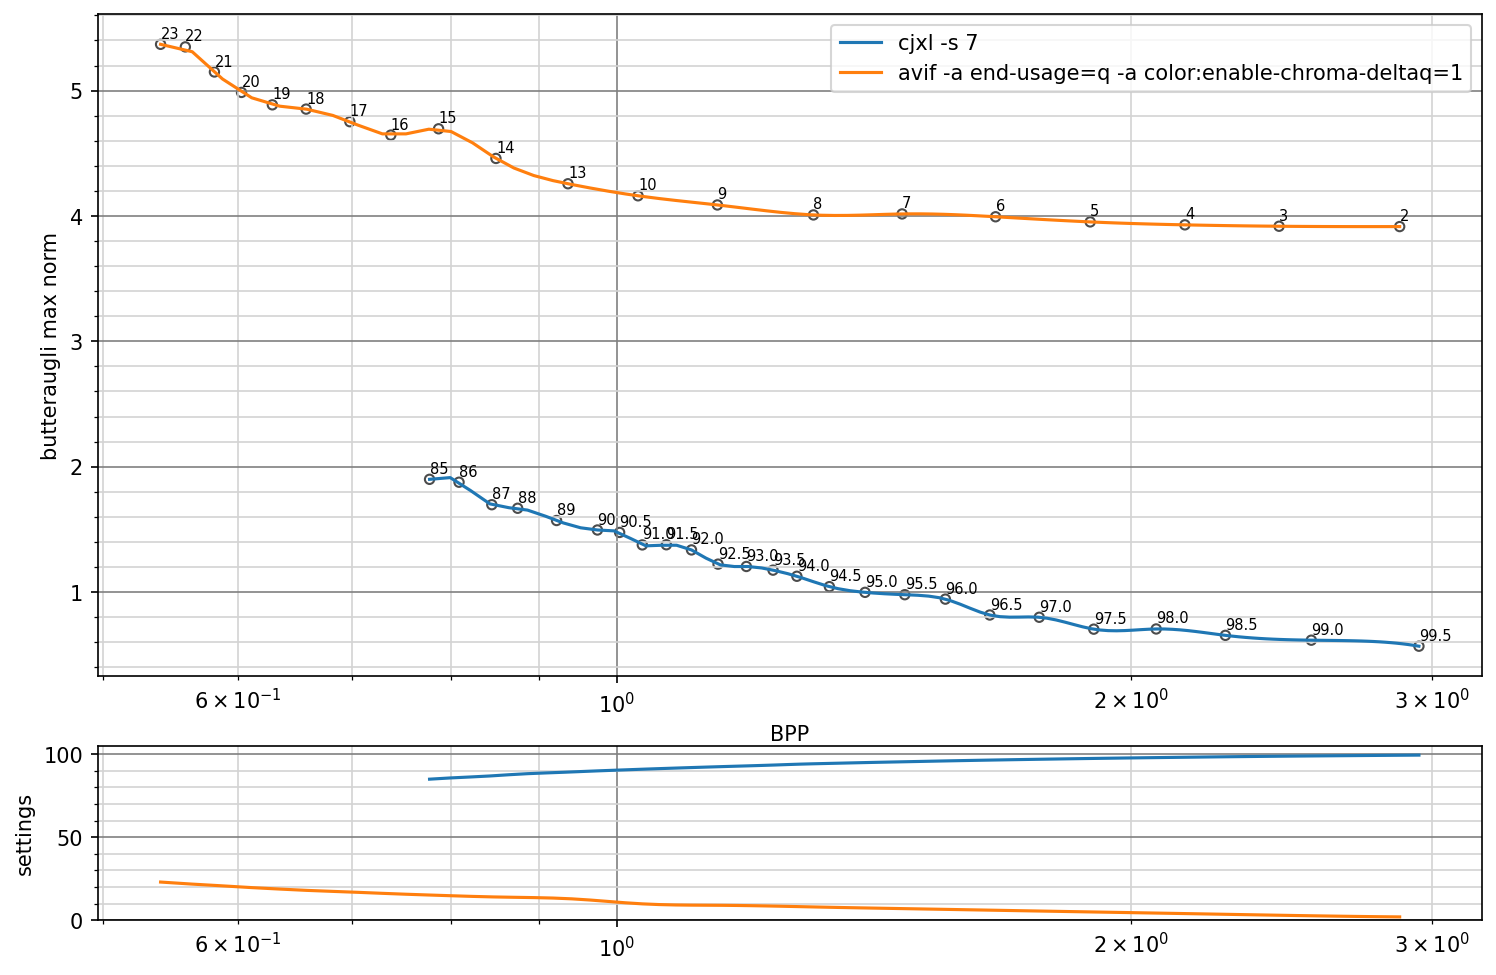

In [8]:
fig = plt.figure(figsize=(16, 8), dpi=150)
grid = plt.GridSpec(4,4, hspace=0.4, wspace=0.1)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[])
ax_main.set_xscale('log')
ax_bottom.set_xscale('log')
# ax_main.xaxis.set_major_formatter(ScalarFormatter())

# PLOT DATA
for n, r in readers.items():
    x = r["Res bpp"]
    y = r["butteraugli max norm"]
#     y = r["butteraugli pnorm"]
    z = r["Method"]
    f_y = sp.interp1d(x, y, kind="cubic")
    f_z = sp.interp1d(x, z, kind="cubic")
    x_new = np.linspace(min(x), max(x), num=100)
    y_new = f_y(x_new)
    z_new = f_z(x_new)
    plot_2d(ax_main, ax_bottom, x, y, x_new, y_new, label=n)
    for i, txt in enumerate(z):
        j = ax_main.annotate(str(txt), (x[i], y[i]+0.05))
        j.set_fontsize(7)


# PLOT SETTINGS
ax_main.grid(True, color='gray')
ax_main.minorticks_on()
ax_main.grid(True, which='minor', color='lightgray')
# ax_main.set_xticks(np.arange(min(x_new), max(x_new)+1, 0.5))
ax_main.set_xlabel("BPP")
ax_main.set_ylabel("butteraugli max norm")
# ax_main.set_ylabel("butteraugli pnorm")

ax_main.legend()

ax_bottom.grid(True, color='gray')
ax_bottom.minorticks_on()
ax_bottom.grid(True, which='minor', color='lightgray')
# ax_bottom.set_xticks(np.arange(min(x_new), max(x_new)+1, 0.5))
ax_bottom.set_ylim(0,105)
ax_bottom.set_ylabel("settings")

plt.show()